# Capstone 3 - CNN Models and training data

In the previous notebook where we performed data preparation, sivided our dataset into train and test datasets, also checked number of classes, visualized some images. 

In this notebook, we will train our data on some popular CNN architectures and compare the performance as well as perform some tuning to see if we can inprove our models

## Imports

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import json

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras import optimizers, regularizers, Model
from keras.applications import densenet
from keras.applications import MobileNetV2, InceptionResNetV2, DenseNet121, ResNet50, InceptionV3, vgg16, Xception
from keras.optimizers import Adam

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import pandas as pd

from keras_tuner import HyperModel

<b> Some parameters for images</b>

In [2]:
# parameters
img_width, img_height = 224, 224  # dimensions to which the images will be resized
batch_size = 32
num_classes = 6  #categories of trash

<b> Specifying directories for train and test datasets</b>

In [4]:
train_dir = 'D:/Springboard/Capstone_3/train_data/'
test_dir = 'D:/Springboard/Capstone_3/test_data'

<b> Augmentation parameters to be used for our dataset</b>

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size)

Found 1898 images belonging to 6 classes.


<b> Only rescaling applied to test dataset</b>

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False)

Found 629 images belonging to 6 classes.


## Different Models and Compiling them 

### Custom Model 1 with 3 Convolutional Layers and 2 FC layers

In [12]:
model1 = Sequential()
model1.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model1.add(MaxPooling2D((2,2),padding='same'))

model1.add(Conv2D(32, 3, padding="same", activation="relu"))
model1.add(MaxPooling2D((2,2),padding='same'))

model1.add(Conv2D(64, 3, padding="same", activation="relu"))
model1.add(MaxPooling2D((2,2),padding='same'))
model1.add(Dropout(0.4))

model1.add(Flatten())
model1.add(Dense(128,activation="relu"))
model1.add(Dense(6, activation="softmax"))


model1.summary()

<b> Compiling Model</b>

In [20]:
model1.compile(optimizer = Adam(lr = .000005) , loss = tf.keras.losses.CategoricalCrossentropy() , metrics = ['accuracy'])

In [24]:
train_1 = model1.fit(
        train_generator,
        #steps_per_epoch=len(train_generator),
        epochs=25,
        validation_data=test_generator)
        #validation_steps=len(test_generator))

Epoch 1/25
60/60 [==============================] - 72s 1s/step - loss: 1.4259 - accuracy: 0.4136 - val_loss: 1.3850 - val_accuracy: 0.4229
Epoch 2/25
60/60 [==============================] - 71s 1s/step - loss: 1.4200 - accuracy: 0.4226 - val_loss: 1.3826 - val_accuracy: 0.4372
Epoch 3/25
60/60 [==============================] - 71s 1s/step - loss: 1.4136 - accuracy: 0.4204 - val_loss: 1.3813 - val_accuracy: 0.4308
Epoch 4/25
60/60 [==============================] - 72s 1s/step - loss: 1.4112 - accuracy: 0.4331 - val_loss: 1.3672 - val_accuracy: 0.4626
Epoch 5/25
60/60 [==============================] - 71s 1s/step - loss: 1.4006 - accuracy: 0.4357 - val_loss: 1.3611 - val_accuracy: 0.4483
Epoch 6/25
60/60 [==============================] - 71s 1s/step - loss: 1.3948 - accuracy: 0.4378 - val_loss: 1.3521 - val_accuracy: 0.4563
Epoch 7/25
60/60 [==============================] - 71s 1s/step - loss: 1.4006 - accuracy: 0.4352 - val_loss: 1.3468 - val_accuracy: 0.4547
Epoch 8/25
60/60 [==

<b> Accuracy & loss Curves</b>

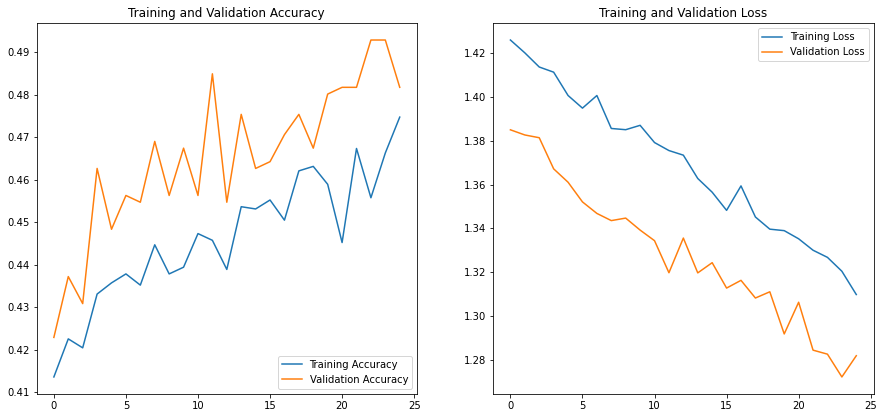

In [26]:
acc = train_1.history['accuracy']
val_acc = train_1.history['val_accuracy']
loss = train_1.history['loss']
val_loss = train_1.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
Y_pred = model1.predict(test_generator, len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))
    
   

Classification Report
              precision    recall  f1-score   support

   cardboard       0.85      0.69      0.76       100
       glass       0.36      0.26      0.30       125
       metal       0.41      0.50      0.45       102
       paper       0.45      0.58      0.51       148
     plastic       0.46      0.53      0.49       120
       trash       0.00      0.00      0.00        34

    accuracy                           0.48       629
   macro avg       0.42      0.43      0.42       629
weighted avg       0.47      0.48      0.47       629



D:\Anacon\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix


<AxesSubplot:>

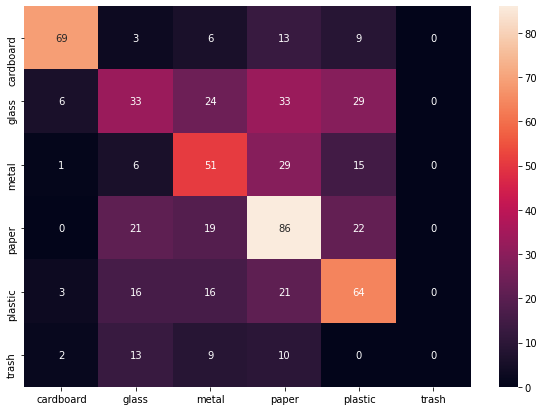

In [32]:
print('Confusion Matrix')
conf_mat = confusion_matrix(test_generator.classes, y_pred)
df_cm = pd.DataFrame(conf_mat, index = target_names, columns = target_names)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

### Custom Model 2

In [57]:
model2 = Sequential()
model2.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model2.add(Conv2D(32,3,padding="same", activation="relu"))
model2.add(MaxPooling2D((2,2),padding='same'))

model2.add(Conv2D(64, 3, padding="same", activation="relu"))
model2.add(Conv2D(64, 3, padding="same", activation="relu"))
model2.add(MaxPooling2D((2,2),padding='same'))

model2.add(Flatten())
model2.add(Dense(128, activation="relu"))
model2.add(Dropout(0.5))

model2.add(Dense(6, activation="softmax"))


model2.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 200704)           

<b> Compile Model 2 </b>

In [58]:
model2.compile(optimizer = Adam(lr = .000005) , loss = tf.keras.losses.CategoricalCrossentropy() , metrics = ['accuracy'])

In [60]:
train_2 = model2.fit(
        train_generator,
        #steps_per_epoch=len(train_generator),
        epochs=20,
        validation_data=test_generator)

Epoch 1/20
60/60 [==============================] - 219s 4s/step - loss: 1.7282 - accuracy: 0.2366 - val_loss: 1.6908 - val_accuracy: 0.2353
Epoch 2/20
60/60 [==============================] - 222s 4s/step - loss: 1.6898 - accuracy: 0.2661 - val_loss: 1.6457 - val_accuracy: 0.3418
Epoch 3/20
60/60 [==============================] - 219s 4s/step - loss: 1.6451 - accuracy: 0.3114 - val_loss: 1.5946 - val_accuracy: 0.3450
Epoch 4/20
60/60 [==============================] - 216s 4s/step - loss: 1.6097 - accuracy: 0.3451 - val_loss: 1.5490 - val_accuracy: 0.4086
Epoch 5/20
60/60 [==============================] - 213s 4s/step - loss: 1.5845 - accuracy: 0.3409 - val_loss: 1.5080 - val_accuracy: 0.4213
Epoch 6/20
60/60 [==============================] - 214s 4s/step - loss: 1.5461 - accuracy: 0.3704 - val_loss: 1.4734 - val_accuracy: 0.4340
Epoch 7/20
60/60 [==============================] - 214s 4s/step - loss: 1.5212 - accuracy: 0.3962 - val_loss: 1.4405 - val_accuracy: 0.4372
Epoch 8/20
60

<b> Accuracy & loss Curves</b>

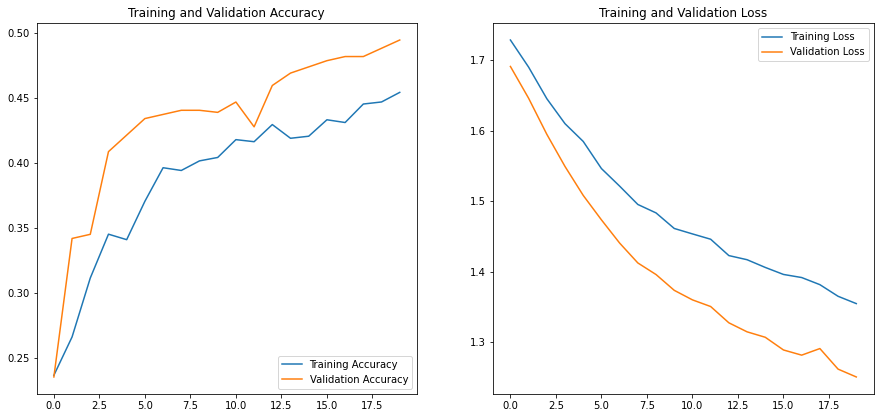

In [62]:
acc = train_2.history['accuracy']
val_acc = train_2.history['val_accuracy']
loss = train_2.history['loss']
val_loss = train_2.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<b> Classification Report - Model 2 </b>

In [63]:
Y_pred = model2.predict(test_generator, len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

   cardboard       0.80      0.78      0.79       100
       glass       0.45      0.34      0.39       125
       metal       0.63      0.25      0.36       102
       paper       0.43      0.58      0.50       148
     plastic       0.40      0.65      0.49       120
       trash       0.00      0.00      0.00        34

    accuracy                           0.49       629
   macro avg       0.45      0.43      0.42       629
weighted avg       0.50      0.49      0.47       629



## Pretrained Models/Transfer Learning

### Inception Model

In [65]:
original_model = InceptionV3()
inp = original_model.get_layer(index=0).input
out = original_model.get_layer(index=-2).output
base_model = Model(inputs = inp, outputs = out)

for layer in base_model.layers:
    layer.trainable = False

model3 = Sequential()
model3.add(base_model)
model3.add(Dense(128,activation='linear'))
model3.add(Dense(1024, activation='relu'))
model3.add(Dense(6,activation='softmax'))

In [66]:
model3.compile(optimizer = Adam(lr = .000005) , loss = tf.keras.losses.CategoricalCrossentropy() , metrics = ['accuracy'])

In [67]:
train_3 = model3.fit(
        train_generator,
        #steps_per_epoch=len(train_generator),
        epochs=20,
        validation_data=test_generator)

Epoch 1/20
60/60 [==============================] - 91s 2s/step - loss: 1.7970 - accuracy: 0.1965 - val_loss: 1.7178 - val_accuracy: 0.2591
Epoch 2/20
60/60 [==============================] - 93s 2s/step - loss: 1.6862 - accuracy: 0.2845 - val_loss: 1.6210 - val_accuracy: 0.3355
Epoch 3/20
60/60 [==============================] - 94s 2s/step - loss: 1.5940 - accuracy: 0.3830 - val_loss: 1.5404 - val_accuracy: 0.4181
Epoch 4/20
60/60 [==============================] - 90s 2s/step - loss: 1.5212 - accuracy: 0.4552 - val_loss: 1.4669 - val_accuracy: 0.4865
Epoch 5/20
60/60 [==============================] - 90s 1s/step - loss: 1.4469 - accuracy: 0.5158 - val_loss: 1.3996 - val_accuracy: 0.5358
Epoch 6/20
60/60 [==============================] - 90s 1s/step - loss: 1.3890 - accuracy: 0.5485 - val_loss: 1.3355 - val_accuracy: 0.5771
Epoch 7/20
60/60 [==============================] - 89s 1s/step - loss: 1.3244 - accuracy: 0.5785 - val_loss: 1.2779 - val_accuracy: 0.5978
Epoch 8/20
60/60 [==

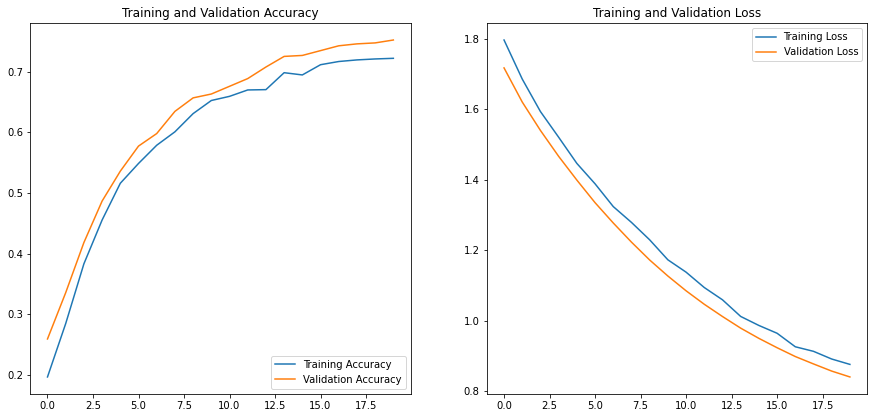

In [68]:
acc = train_3.history['accuracy']
val_acc = train_3.history['val_accuracy']
loss = train_3.history['loss']
val_loss = train_3.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [69]:
Y_pred = model3.predict(test_generator, len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

   cardboard       0.89      0.85      0.87       100
       glass       0.78      0.67      0.72       125
       metal       0.66      0.72      0.69       102
       paper       0.74      0.89      0.81       148
     plastic       0.71      0.78      0.74       120
       trash       1.00      0.15      0.26        34

    accuracy                           0.75       629
   macro avg       0.80      0.68      0.68       629
weighted avg       0.77      0.75      0.74       629



Confusion Matrix


<AxesSubplot:>

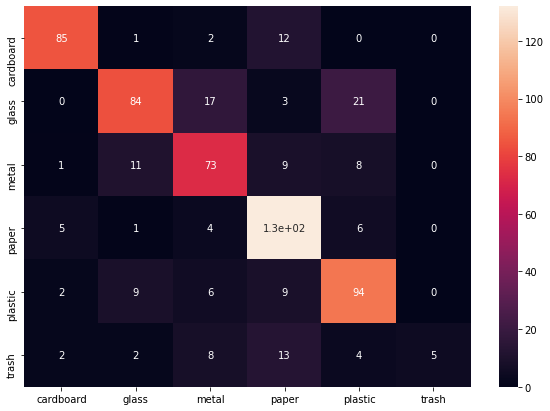

In [70]:
print('Confusion Matrix')
conf_mat = confusion_matrix(test_generator.classes, y_pred)
df_cm = pd.DataFrame(conf_mat, index = target_names, columns = target_names)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

### MobileNet Model

In [71]:
input_tensor = Input(shape=(224 , 224, 3))

original_model = MobileNetV2(input_tensor=input_tensor, weights='imagenet')

input_mob = original_model.get_layer(index=0).input
output_mob = original_model.get_layer(index=-2).output
mob_model = Model(inputs = input_mob, outputs = output_mob)

for layer in mob_model.layers:
    layer.trainable = False

model4 = Sequential()
model4.add(mob_model)
model4.add(Dense(1024,activation='relu'))
model4.add(Dropout(0.25))
model4.add(Dense(1024, activation='relu'))
model4.add(Dense(6,activation='softmax'))

14540800/14536120 [==============================] - 5s 0us/step


In [72]:
model4.compile(optimizer = Adam(lr = .000005) , loss = tf.keras.losses.CategoricalCrossentropy() , metrics = ['accuracy'])

In [73]:
train_4 = model4.fit(
        train_generator,
        #steps_per_epoch=len(train_generator),
        epochs=20,
        validation_data=test_generator)

Epoch 1/20
60/60 [==============================] - 64s 1s/step - loss: 1.8118 - accuracy: 0.2097 - val_loss: 1.6915 - val_accuracy: 0.2878
Epoch 2/20
60/60 [==============================] - 63s 1s/step - loss: 1.6163 - accuracy: 0.3367 - val_loss: 1.5386 - val_accuracy: 0.4388
Epoch 3/20
60/60 [==============================] - 64s 1s/step - loss: 1.4746 - accuracy: 0.4842 - val_loss: 1.4154 - val_accuracy: 0.5215
Epoch 4/20
60/60 [==============================] - 64s 1s/step - loss: 1.3673 - accuracy: 0.5369 - val_loss: 1.3094 - val_accuracy: 0.5771
Epoch 5/20
60/60 [==============================] - 64s 1s/step - loss: 1.2907 - accuracy: 0.5759 - val_loss: 1.2202 - val_accuracy: 0.5978
Epoch 6/20
60/60 [==============================] - 63s 1s/step - loss: 1.2084 - accuracy: 0.5975 - val_loss: 1.1417 - val_accuracy: 0.6359
Epoch 7/20
60/60 [==============================] - 64s 1s/step - loss: 1.1483 - accuracy: 0.6264 - val_loss: 1.0751 - val_accuracy: 0.6518
Epoch 8/20
60/60 [==

<b> Accuracy & loss Curves</b>

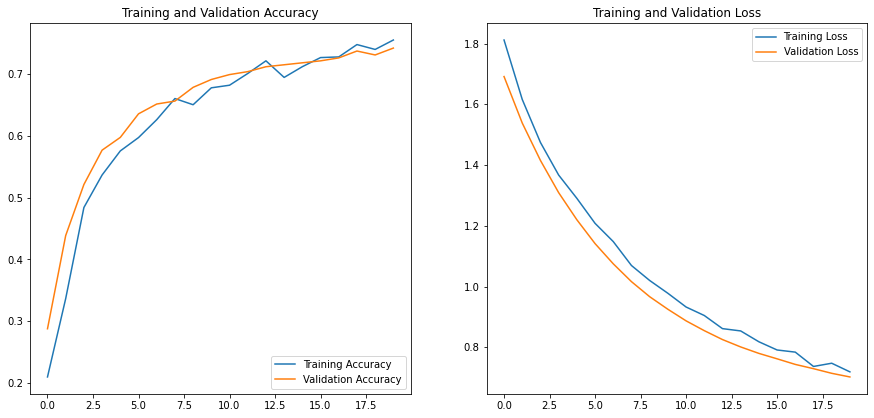

In [74]:
acc = train_4.history['accuracy']
val_acc = train_4.history['val_accuracy']
loss = train_4.history['loss']
val_loss = train_4.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [75]:
Y_pred = model4.predict(test_generator, len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

   cardboard       0.95      0.82      0.88       100
       glass       0.74      0.59      0.66       125
       metal       0.70      0.80      0.75       102
       paper       0.76      0.90      0.82       148
     plastic       0.66      0.75      0.70       120
       trash       0.46      0.18      0.26        34

    accuracy                           0.74       629
   macro avg       0.71      0.67      0.68       629
weighted avg       0.74      0.74      0.73       629



Confusion Matrix


<AxesSubplot:>

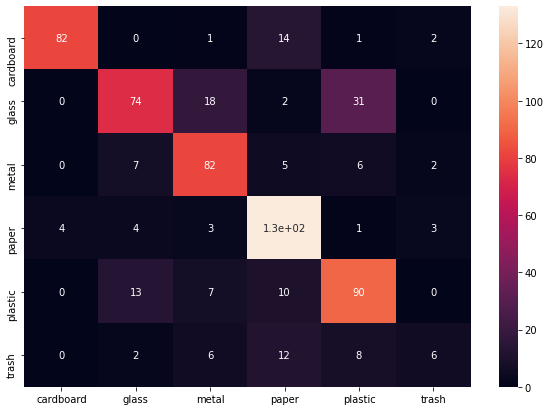

In [76]:
print('Confusion Matrix')
conf_mat = confusion_matrix(test_generator.classes, y_pred)
df_cm = pd.DataFrame(conf_mat, index = target_names, columns = target_names)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

### DenseNet Model

In [78]:
input_tensor = Input(shape=(224 , 224, 3))

original_model = DenseNet121(input_tensor=input_tensor, weights='imagenet')

input_mob = original_model.get_layer(index=0).input
output_mob = original_model.get_layer(index=-2).output
den_model = Model(inputs = input_mob, outputs = output_mob)

for layer in den_model.layers:
    layer.trainable = False

model5 = Sequential()
model5.add(den_model)
model5.add(Dense(1024,activation='relu'))
model5.add(Dropout(0.4))
model5.add(Dense(1024, activation='relu'))
model5.add(Dense(6,activation='softmax'))

33193984/33188688 [==============================] - 7s 0us/step


In [80]:
model5.compile(optimizer = Adam(lr = .000005) , loss = tf.keras.losses.CategoricalCrossentropy() , metrics = ['accuracy'])

In [81]:
train_5 = model5.fit(
        train_generator,
        #steps_per_epoch=len(train_generator),
        epochs=20,
        validation_data=test_generator)

Epoch 1/20
60/60 [==============================] - 187s 3s/step - loss: 1.8016 - accuracy: 0.2329 - val_loss: 1.6106 - val_accuracy: 0.3259
Epoch 2/20
60/60 [==============================] - 184s 3s/step - loss: 1.6454 - accuracy: 0.2935 - val_loss: 1.4967 - val_accuracy: 0.4165
Epoch 3/20
60/60 [==============================] - 184s 3s/step - loss: 1.5361 - accuracy: 0.3815 - val_loss: 1.4063 - val_accuracy: 0.4595
Epoch 4/20
60/60 [==============================] - 182s 3s/step - loss: 1.4647 - accuracy: 0.4226 - val_loss: 1.3269 - val_accuracy: 0.5024
Epoch 5/20
60/60 [==============================] - 185s 3s/step - loss: 1.3819 - accuracy: 0.4758 - val_loss: 1.2554 - val_accuracy: 0.5437
Epoch 6/20
60/60 [==============================] - 197s 3s/step - loss: 1.3169 - accuracy: 0.5205 - val_loss: 1.1905 - val_accuracy: 0.5803
Epoch 7/20
60/60 [==============================] - 188s 3s/step - loss: 1.2561 - accuracy: 0.5379 - val_loss: 1.1350 - val_accuracy: 0.6041
Epoch 8/20
60

<b> Accuracy & loss Curves</b>

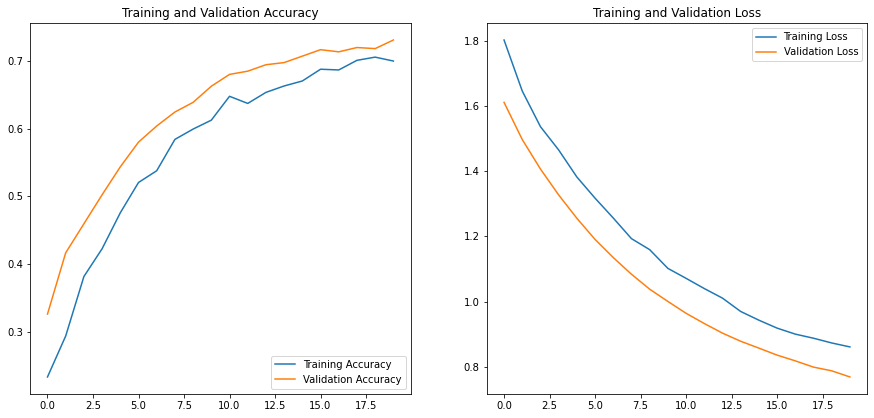

In [82]:
acc = train_5.history['accuracy']
val_acc = train_5.history['val_accuracy']
loss = train_5.history['loss']
val_loss = train_5.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [83]:
Y_pred = model5.predict(test_generator, len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

   cardboard       0.88      0.81      0.84       100
       glass       0.68      0.77      0.72       125
       metal       0.78      0.73      0.75       102
       paper       0.70      0.89      0.78       148
     plastic       0.71      0.61      0.65       120
       trash       0.56      0.15      0.23        34

    accuracy                           0.73       629
   macro avg       0.72      0.66      0.66       629
weighted avg       0.73      0.73      0.72       629



Confusion Matrix


<AxesSubplot:>

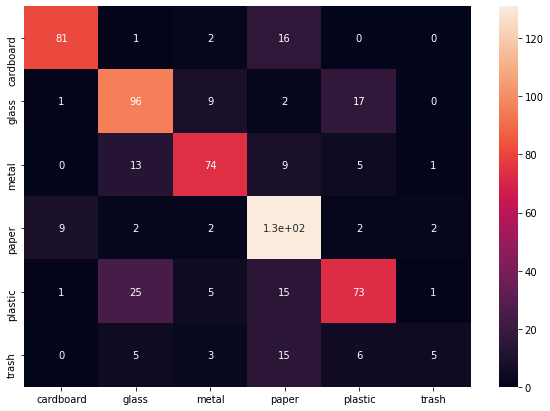

In [84]:
print('Confusion Matrix')
conf_mat = confusion_matrix(test_generator.classes, y_pred)
df_cm = pd.DataFrame(conf_mat, index = target_names, columns = target_names)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

### VVG-16 Model

In [131]:
input_tensor = Input(shape=(224 , 224, 3))

original_model = vgg16.VGG16(input_tensor=input_tensor, weights='imagenet')

input_mob = original_model.get_layer(index=0).input
output_mob = original_model.get_layer(index=-2).output
vgg_model = Model(inputs = input_mob, outputs = output_mob)

for layer in vgg_model.layers:
    layer.trainable = False

model6 = Sequential()
model6.add(vgg_model)
model6.add(Dense(4096,activation='relu'))
model6.add(Dropout(0.4))
model6.add(Dense(4096, activation='relu'))
model6.add(Dense(6,activation='softmax'))

In [132]:
model6.compile(optimizer = Adam(lr = .000005) , loss = tf.keras.losses.CategoricalCrossentropy() , metrics = ['accuracy'])

In [133]:
train_6 = model6.fit(
        train_generator,
        #steps_per_epoch=len(train_generator),
        epochs=20,
        validation_data=test_generator)

Epoch 1/20
60/60 [==============================] - 385s 6s/step - loss: 1.7378 - accuracy: 0.2497 - val_loss: 1.5510 - val_accuracy: 0.3927
Epoch 2/20
60/60 [==============================] - 358s 6s/step - loss: 1.5943 - accuracy: 0.3277 - val_loss: 1.4724 - val_accuracy: 0.3768
Epoch 3/20
60/60 [==============================] - 357s 6s/step - loss: 1.5137 - accuracy: 0.3736 - val_loss: 1.3807 - val_accuracy: 0.4324
Epoch 4/20
60/60 [==============================] - 351s 6s/step - loss: 1.4458 - accuracy: 0.4036 - val_loss: 1.3231 - val_accuracy: 0.4229
Epoch 5/20
60/60 [==============================] - 350s 6s/step - loss: 1.3919 - accuracy: 0.4231 - val_loss: 1.2809 - val_accuracy: 0.4452
Epoch 6/20
60/60 [==============================] - 350s 6s/step - loss: 1.3597 - accuracy: 0.4447 - val_loss: 1.2533 - val_accuracy: 0.4754
Epoch 7/20
60/60 [==============================] - 349s 6s/step - loss: 1.3067 - accuracy: 0.4658 - val_loss: 1.1871 - val_accuracy: 0.5151
Epoch 8/20
60

<b> Accuracy & loss Curves</b>

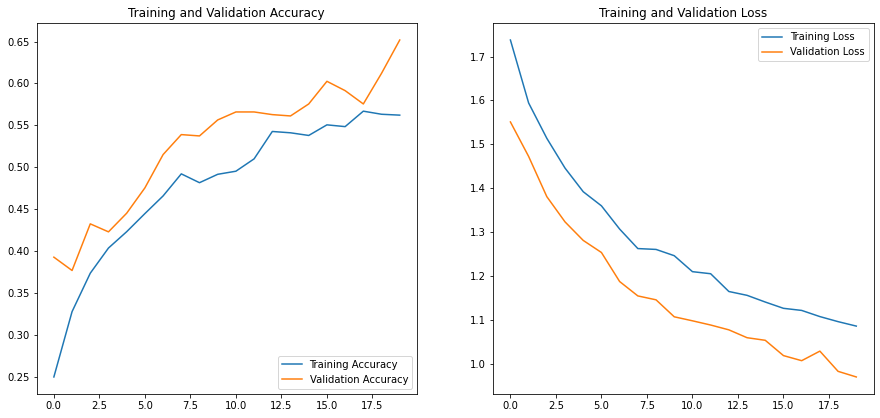

In [134]:
acc = train_6.history['accuracy']
val_acc = train_6.history['val_accuracy']
loss = train_6.history['loss']
val_loss = train_6.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [135]:
Y_pred = model6.predict(test_generator, len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

   cardboard       0.72      0.69      0.70       100
       glass       0.71      0.54      0.62       125
       metal       0.64      0.69      0.66       102
       paper       0.71      0.78      0.74       148
     plastic       0.55      0.65      0.59       120
       trash       0.45      0.26      0.33        34

    accuracy                           0.65       629
   macro avg       0.63      0.60      0.61       629
weighted avg       0.65      0.65      0.65       629



Confusion Matrix


<AxesSubplot:>

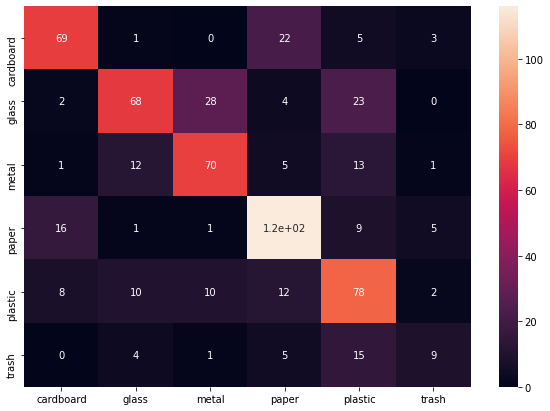

In [136]:
print('Confusion Matrix')
conf_mat = confusion_matrix(test_generator.classes, y_pred)
df_cm = pd.DataFrame(conf_mat, index = target_names, columns = target_names)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

### ResNet-50 Model

In [91]:
input_tensor = Input(shape=(224 , 224, 3))

original_model = ResNet50(input_tensor=input_tensor, weights='imagenet')

input_mob = original_model.get_layer(index=0).input
output_mob = original_model.get_layer(index=-2).output
res_model = Model(inputs = input_mob, outputs = output_mob)

for layer in res_model.layers:
    layer.trainable = False

model7 = Sequential()
model7.add(res_model)
model7.add(Dense(1024,activation='relu'))
model7.add(Dropout(0.4))
model7.add(Dense(1024, activation='relu'))
model7.add(Dense(6,activation='softmax'))

102973440/102967424 [==============================] - 52s 1us/step


In [92]:
model7.compile(optimizer = Adam(lr = .000005) , loss = tf.keras.losses.CategoricalCrossentropy() , metrics = ['accuracy'])

In [93]:
train_7 = model7.fit(
        train_generator,
        #steps_per_epoch=len(train_generator),
        epochs=20,
        validation_data=test_generator)

Epoch 1/20
60/60 [==============================] - 159s 3s/step - loss: 1.8622 - accuracy: 0.1733 - val_loss: 1.7321 - val_accuracy: 0.2353
Epoch 2/20
60/60 [==============================] - 161s 3s/step - loss: 1.7808 - accuracy: 0.2208 - val_loss: 1.7103 - val_accuracy: 0.2893
Epoch 3/20
60/60 [==============================] - 152s 3s/step - loss: 1.7588 - accuracy: 0.2097 - val_loss: 1.6994 - val_accuracy: 0.2496
Epoch 4/20
60/60 [==============================] - 151s 3s/step - loss: 1.7559 - accuracy: 0.2229 - val_loss: 1.6929 - val_accuracy: 0.2798
Epoch 5/20
60/60 [==============================] - 150s 3s/step - loss: 1.7566 - accuracy: 0.2092 - val_loss: 1.6884 - val_accuracy: 0.2846
Epoch 6/20
60/60 [==============================] - 151s 3s/step - loss: 1.7450 - accuracy: 0.2345 - val_loss: 1.6846 - val_accuracy: 0.2846
Epoch 7/20
60/60 [==============================] - 153s 3s/step - loss: 1.7387 - accuracy: 0.2287 - val_loss: 1.6793 - val_accuracy: 0.2862
Epoch 8/20
60

<b> Accuracy & loss Curves</b>

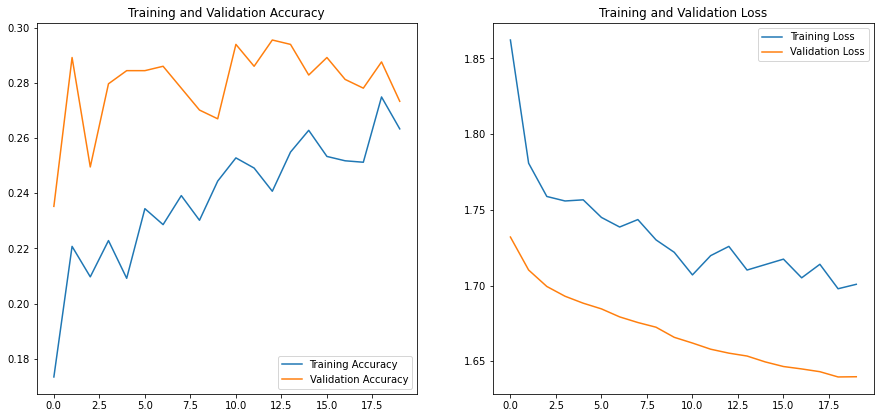

In [99]:
acc = train_7.history['accuracy']
val_acc = train_7.history['val_accuracy']
loss = train_7.history['loss']
val_loss = train_7.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [100]:
Y_pred = model7.predict(test_generator, len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

   cardboard       0.00      0.00      0.00       100
       glass       0.23      0.67      0.35       125
       metal       0.00      0.00      0.00       102
       paper       0.33      0.59      0.42       148
     plastic       0.00      0.00      0.00       120
       trash       0.00      0.00      0.00        34

    accuracy                           0.27       629
   macro avg       0.09      0.21      0.13       629
weighted avg       0.12      0.27      0.17       629



Confusion Matrix


<AxesSubplot:>

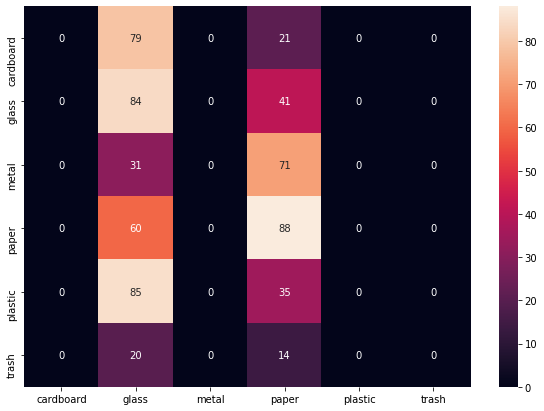

In [101]:
print('Confusion Matrix')
conf_mat = confusion_matrix(test_generator.classes, y_pred)
df_cm = pd.DataFrame(conf_mat, index = target_names, columns = target_names)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

### Xception Model 

In [96]:
input_tensor = Input(shape=(224 , 224, 3))

original_model = Xception(input_tensor=input_tensor, weights='imagenet')

input_mob = original_model.get_layer(index=0).input
output_mob = original_model.get_layer(index=-2).output
xce_model = Model(inputs = input_mob, outputs = output_mob)

for layer in xce_model.layers:
    layer.trainable = False

model8 = Sequential()
model8.add(xce_model)
model8.add(Dense(1024,activation='relu'))
model8.add(Dropout(0.4))
model8.add(Dense(1024, activation='relu'))
model8.add(Dense(6,activation='softmax'))

91889664/91884032 [==============================] - 26s 0us/step


In [97]:
model8.compile(optimizer = Adam(lr = .000005) , loss = tf.keras.losses.CategoricalCrossentropy() , metrics = ['accuracy'])

In [98]:
train_8 = model8.fit(
        train_generator,
        #steps_per_epoch=len(train_generator),
        epochs=20,
        validation_data=test_generator)

Epoch 1/20
60/60 [==============================] - 184s 3s/step - loss: 1.8046 - accuracy: 0.1891 - val_loss: 1.6718 - val_accuracy: 0.3466
Epoch 2/20
60/60 [==============================] - 181s 3s/step - loss: 1.6429 - accuracy: 0.3599 - val_loss: 1.5448 - val_accuracy: 0.5024
Epoch 3/20
60/60 [==============================] - 180s 3s/step - loss: 1.5382 - accuracy: 0.4694 - val_loss: 1.4414 - val_accuracy: 0.5517
Epoch 4/20
60/60 [==============================] - 182s 3s/step - loss: 1.4430 - accuracy: 0.5311 - val_loss: 1.3482 - val_accuracy: 0.5930
Epoch 5/20
60/60 [==============================] - 181s 3s/step - loss: 1.3641 - accuracy: 0.5843 - val_loss: 1.2588 - val_accuracy: 0.6407
Epoch 6/20
60/60 [==============================] - 180s 3s/step - loss: 1.2889 - accuracy: 0.6170 - val_loss: 1.1777 - val_accuracy: 0.6836
Epoch 7/20
60/60 [==============================] - 180s 3s/step - loss: 1.2123 - accuracy: 0.6581 - val_loss: 1.1024 - val_accuracy: 0.7075
Epoch 8/20
60

<b> Accuracy & loss Curves</b>

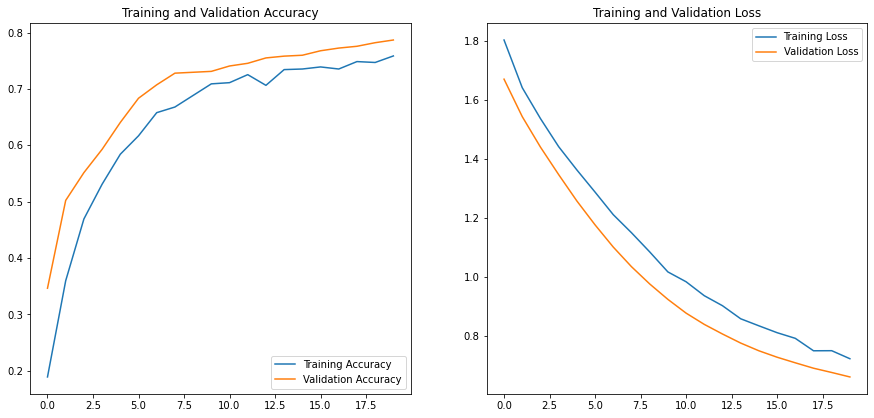

In [102]:
acc = train_8.history['accuracy']
val_acc = train_8.history['val_accuracy']
loss = train_8.history['loss']
val_loss = train_8.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [103]:
Y_pred = model8.predict(test_generator, len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

   cardboard       0.91      0.85      0.88       100
       glass       0.81      0.77      0.79       125
       metal       0.76      0.79      0.78       102
       paper       0.77      0.89      0.82       148
     plastic       0.72      0.78      0.75       120
       trash       0.88      0.21      0.33        34

    accuracy                           0.79       629
   macro avg       0.81      0.72      0.73       629
weighted avg       0.79      0.79      0.78       629



Confusion Matrix


<AxesSubplot:>

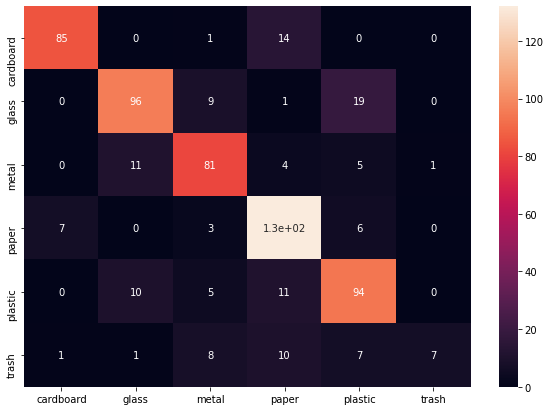

In [104]:
print('Confusion Matrix')
conf_mat = confusion_matrix(test_generator.classes, y_pred)
df_cm = pd.DataFrame(conf_mat, index = target_names, columns = target_names)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## Fine Tuned HyperModels 

###  HyperModel 1 

In [120]:
class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = Sequential()
        model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=self.input_shape))
        model.add(Conv2D(filters=hp.Choice(
                    'num_filters_1',
                    values=[32, 64],
                    default=32), activation='relu', kernel_size=3))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))
        model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
        model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.5,
                default=0.25,
                step=0.05,
            ))
        )
        model.add(Flatten())
        model.add(
            Dense(
                units=hp.Int(
                    'units',
                    min_value=32,
                    max_value=256,
                    step=32,
                    default=128
                ),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh'],
                    default='relu'
                )
            )
        )
        model.add(
            Dropout(
                rate=hp.Float(
                    'dropout_3',
                    min_value=0.0,
                    max_value=0.5,
                    default=0.25,
                    step=0.05
                )
            )
        )
        model.add(Dense(self.num_classes, activation='softmax'))
        
        model.compile(
            optimizer=Adam(
                hp.Float(
                    'learning_rate',
                    min_value=1e-4,
                    max_value=1e-2,
                    sampling='LOG',
                    default=1e-3
                )
            ),
            loss=tf.keras.losses.CategoricalCrossentropy(),
            metrics=['accuracy']
        )
        return model

In [121]:
hypermodel = CNNHyperModel(input_shape=(224, 224, 3), num_classes=6)

In [125]:
from keras_tuner.tuners import RandomSearch

tuner = RandomSearch(
    hypermodel,
    objective='accuracy',
    seed=1,
    max_trials=2,
    executions_per_trial=2
)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


In [126]:

tuner.search_space_summary()

Search space summary
Default search space size: 7
num_filters_1 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64], 'ordered': True}
dropout_1 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
dropout_2 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
units (Int)
{'default': 128, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout_3 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [127]:
tuner.search(train_generator, epochs=10)

Trial 2 Complete [01h 16m 24s]
accuracy: 0.5640147626399994

Best accuracy So Far: 0.5640147626399994
Total elapsed time: 02h 31m 41s
INFO:tensorflow:Oracle triggered exit


In [128]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='accuracy', direction='max')
Trial summary
Hyperparameters:
num_filters_1: 32
dropout_1: 0.25
dropout_2: 0.30000000000000004
units: 128
dense_activation: tanh
dropout_3: 0.15000000000000002
learning_rate: 0.00016355245798526342
Score: 0.5640147626399994
Trial summary
Hyperparameters:
num_filters_1: 32
dropout_1: 0.5
dropout_2: 0.1
units: 96
dense_activation: tanh
dropout_3: 0.4
learning_rate: 0.0004442889681244208
Score: 0.3727607876062393


In [129]:
best_model = tuner.get_best_models(num_models=1)[0]

In [130]:
loss, accuracy = best_model.evaluate(test_generator)

20/20 [==============================] - 15s 756ms/step - loss: 1.1442 - accuracy: 0.6216


## Model Comparison

| Model | Training Accuracy | Test Accuracy 
| :-: | :-: | :-: | 
| <b>Custom Sequential with 3 Conv & 2 FC layers</b> | 0.475 | 0.482 |
| <b>Custom Sequential with 4 Conv & 2 FC layers</b> | 0.454 | 0.494 |
| <b>Inception V3</b> | 0.722| 0.752 |
| <b>MobileNet</b> | 0.756 | 0.742 |
| <b>DenseNet121</b> | 0.700 | 0.731 |
| <b>VGG16</b> | 0.562 | 0.652 |
| <b>Resnet50</b> | 0.263 | 0.273 |
| <b>Xception</b> | 0.759 | 0.787 |
| <b>HyperModel using Random Search – Best Model</b> | 0.564 | 0.622 |

<b> Conclusion </b>

I developed lot of models for my project some Keras sequential and others were Transfer Learning Models to achieve the best accuracy. As per the results after 
 * running 20 epochs
 * using SoftMax Classifier 
 * Categorical Crossentropy
 * Adam Optimizer

on all our models, Inception and xception transfer models seemed to be best fit for our project with accuracy around 79%. For future works, we can expand our modelling to incorporate more models with some parameter tweaking to see if we can achive more better accuracy 